# Exploratory Data Analysis (EDA) of an E-commerce Dataset

This dataset contains e-commerce transaction data, including details about orders, customers, products, and sales. The goal is to analyze sales patterns, customer behavior, and key business metrics.

dataset: https://www.kaggle.com/datasets/mervemenekse/ecommerce-dataset?utm_medium=social&utm_campaign=kaggle-dataset-share&utm_source=twitter

## Initial Plan for Data Exploration

- Data Cleaning & Preparation: I will check for missing values, incorrect data types, and any necessary preprocessing steps.

- Exploratory Data Analysis (EDA): I will analyze overall trends, identify key patterns, and look for any interesting insights.

- Hypothesis Formulation: I will define at least three hypotheses to test potential relationships within the data.

- Statistical Testing: I will perform significance tests to validate the hypotheses and see if the observed patterns are meaningful.

- Next Steps: Based on the findings, I will suggest further analyses to gain deeper insights.

- Data Quality & Additional Data Request: I will assess whether the dataset is complete and identify any missing information that could improve the analysis.

## Data Cleaning & Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read csv
df = pd.read_csv('/content/drive/MyDrive/e-commerce.csv')
df.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

In [ ]:
# check null values
df.isnull().sum()

,0
Order_Date,0
Time,0
Aging,1
Customer_Id,0
Gender,0
Device_Type,0
Customer_Login_type,0
Product_Category,0
Product,0
Sales,1


I see that there are some missing values. They seem to be very few in numbers, but when I think about a real-life scenario, this amount could be higher. For this reason, I want to look at how much missing data is in percentage terms.

In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

,0
Order_Date,0.000000
Time,0.000000
Aging,0.001950
Customer_Id,0.000000
Gender,0.000000
Device_Type,0.000000
Customer_Login_type,0.000000
Product_Category,0.000000
Product,0.000000
Sales,0.001950


When we look at the missing data rates, we see a maximum of 0.0039% missing data. Since this is a very low rate, it would be a logical option to completely remove the missing values. Our data loss will be negligible.

If there was a value of 5% and above, we could evaluate options such as filling with mean or median.

In [ ]:
# replace the null values

df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Order_Date,0
Time,0
Aging,0
Customer_Id,0
Gender,0
Device_Type,0
Customer_Login_type,0
Product_Category,0
Product,0
Sales,0


We have cleaned the null values. Now we need to examine the data types.

In [ ]:
df.dtypes

,0
Order_Date,object
Time,object
Aging,float64
Customer_Id,int64
Gender,object
Device_Type,object
Customer_Login_type,object
Product_Category,object
Product,object
Sales,float64


When I examined the data types, I noticed the following:

- Date and time data should be in datetime format, not object.

- Quantity data should be integer, but it appears as float64.

- Categorical variables (Gender, Device_Type, Customer_Login_type, Order_Priority, Payment_method) should be in category format, not object

In [ ]:
# date and time values

df['Order_Date'] = pd.to_datetime(df['Order_Date'])

df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

In [ ]:
# quantity values

df['Quantity'] = df['Quantity'].astype(int)

In [ ]:
# category values

categorical_columns = ['Gender', 'Device_Type', 'Customer_Login_type', 'Order_Priority', 'Payment_method', 'Product', 'Product_Category']
for col in categorical_columns:
  df[col] = df[col].astype('category')

In [ ]:
df.dtypes

,0
Order_Date,datetime64[ns]
Time,datetime64[ns]
Aging,float64
Customer_Id,int64
Gender,category
Device_Type,category
Customer_Login_type,category
Product_Category,category
Product,category
Sales,float64


Now, let's check statistical values

In [ ]:
df.describe()

,Order_Date,Time,Aging,Customer_Id,Sales,Quantity,Discount,Profit,Shipping_Cost
count,51282,51282,51282.000000,51282.000000,51282.000000,51282.000000,51282.000000,51282.000000,51282.000000
mean,2018-07-23 11:35:56.124956160,1900-01-01 15:16:28.640127232,5.255187,58159.746656,152.337350,2.502964,0.303838,70.401796,7.041166
min,2018-01-01 00:00:00,1900-01-01 00:00:06,1.000000,10000.000000,33.000000,1.000000,0.100000,0.500000,0.100000
25%,2018-05-07 00:00:00,1900-01-01 11:39:10.500000,3.000000,35841.500000,85.000000,1.000000,0.200000,24.900000,2.500000
50%,2018-07-28 00:00:00,1900-01-01 15:32:25,5.000000,61021.500000,133.000000,2.000000,0.300000,59.900000,6.000000
75%,2018-10-17 00:00:00,1900-01-01 19:36:59,8.000000,80739.250000,218.000000,4.000000,0.400000,118.400000,11.800000
max,2018-12-30 00:00:00,1900-01-01 23:59:58,10.500000,99999.000000,250.000000,5.000000,0.500000,167.500000,16.800000
std,NaN,NaN,2.960073,26031.763189,66.492468,1.511834,0.131025,48.728131,4.871685


In [ ]:
# number of unique values for categories

print(df.select_dtypes(include=['category']).nunique())

Gender                  2
Device_Type             2
Customer_Login_type     4
Product_Category        4
Product                42
Order_Priority          4
Payment_method          5
dtype: int64


Let's look at the top 10 product sold

## Exploratory Data Analysis (EDA)

In [ ]:
top_products = df['Product'].value_counts().head(10)

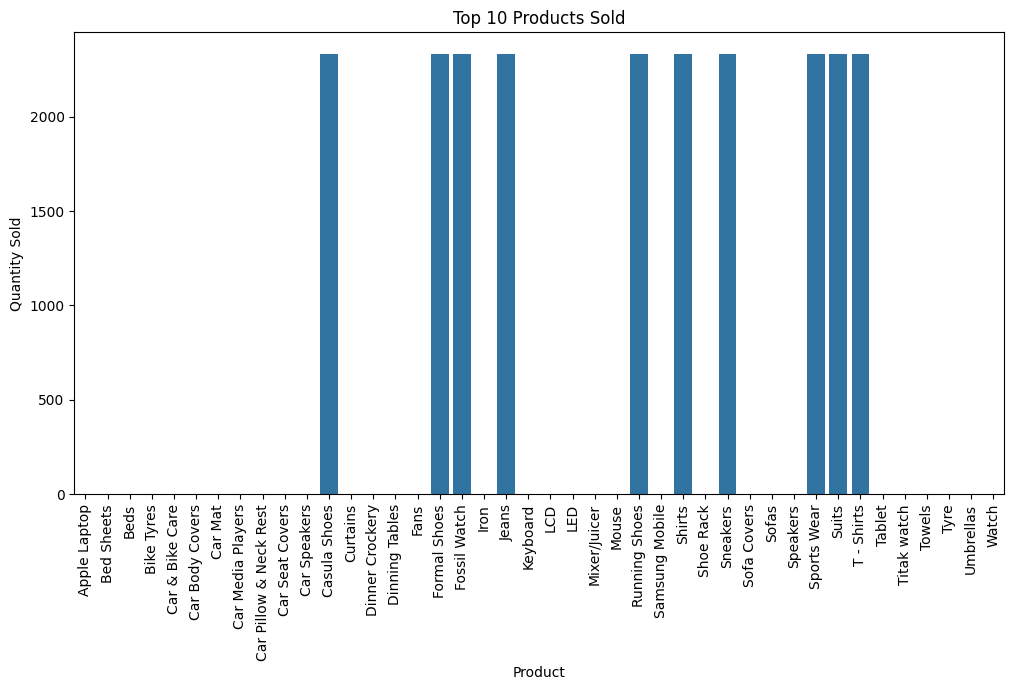

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.title('Top 10 Products Sold')
plt.show()

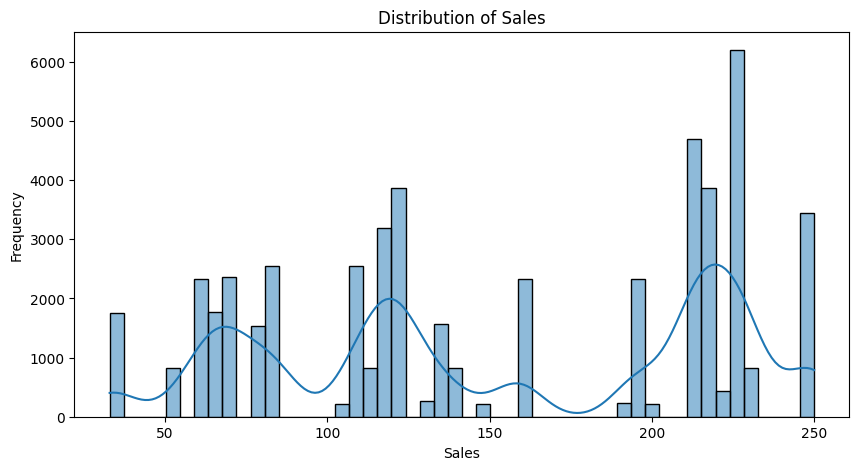

In [ ]:
# Distribution of Total Sales Amounts

plt.figure(figsize=(10, 5))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

<ipython-input-40-365e8ff98a7d>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_categories = df.groupby("Product_Category")['Sales'].sum().sort_values(ascending=False).head(10)


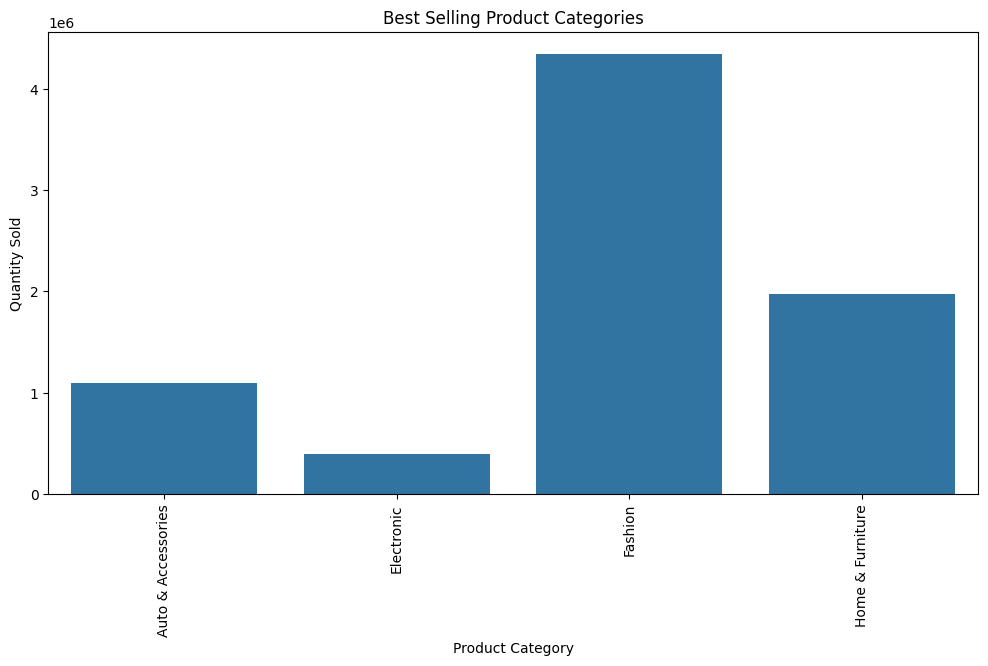

In [ ]:
# Best Selling Product Categories

top_categories = df.groupby("Product_Category")['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.xticks(rotation=90)
plt.xlabel('Product Category')
plt.ylabel('Quantity Sold')
plt.title('Best Selling Product Categories')
plt.show()

## Key Findings and Insights

### 1. Orders appear to be spread out throughout the year.

- When we look at the Order_Date variable, there are orders throughout 2018.
  - Earliest order: January 1, 2018
  - Latest order: December 30, 2018
  
We can create a time series chart to do seasonal analysis.

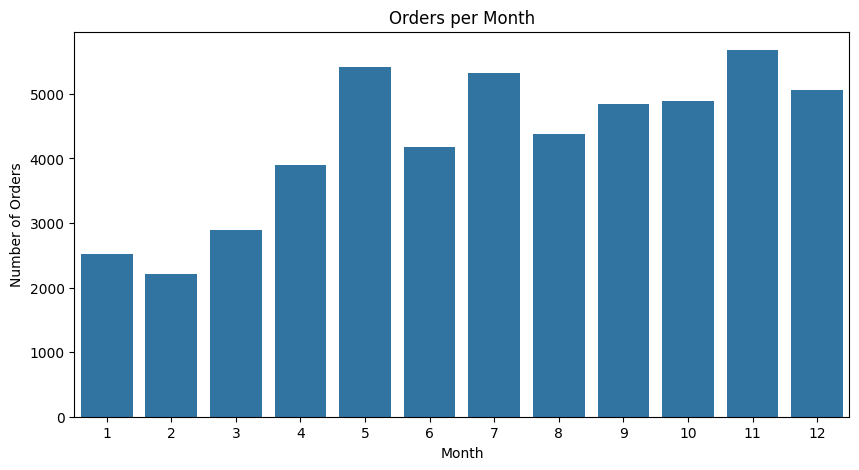

In [ ]:
# monthly analysis

df['Month'] = df['Order_Date'].dt.month

plt.figure(figsize=(10, 5))
sns.countplot(x=df['Month'])
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Orders per Month')
plt.show()

Order Numbers by Month

- The highest number of orders were placed in November and May.

- The lowest order amount is in February.

In general, an increase in orders is observed in the second half of the year (July - December).

Suggestions:

- The increase in November may probably be related to Black Friday and New Year's shopping.

- Special campaigns should be increased during periods such as Black Friday and New Year's.

- Since sales are low in February, special discounts or incentives can be made.

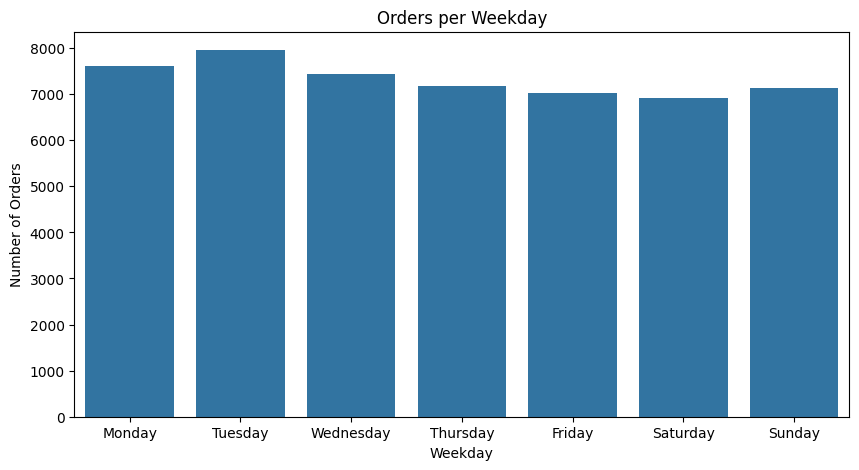

In [ ]:
# weekly analysis

df['Weekday'] = df['Order_Date'].dt.day_name()

plt.figure(figsize=(10, 5))
sns.countplot(x=df['Weekday'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Weekday')
plt.ylabel('Number of Orders')
plt.title('Orders per Weekday')
plt.show()

Order Distribution by Day of the Week

- It is seen that orders peak on Tuesday.

- Saturday and Friday have the lowest order density.

- In general, orders are higher on weekdays.

Suggestions:

- Special weekend discounts can be made to increase weekend sales.

- Campaigns can be useful.

- Operational processes should be optimized to meet the demand during the week, especially on Tuesday.

- Stock management and customer service should be more active on busy days.

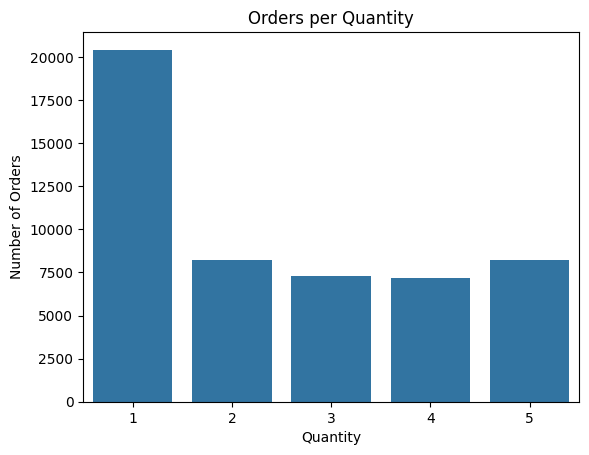

In [ ]:
# Sales and Quantity

sns.countplot(x=df['Quantity'])
plt.xlabel('Quantity')
plt.ylabel('Number of Orders')
plt.title('Orders per Quantity')
plt.show()

Distribution According to Order Quantities

- Most orders were placed as single items.
- Multiple order numbers are evenly distributed between 2-5.

Suggestions:

- Promotions such as “Free shipping on purchases over X TL” or “20% discount on the 2nd product” can be offered to encourage customers to buy more products.

## Hypotheses

Based on the EDA results, we can create three hypotheses to test the data:

1. Hypothesis 1 (Relationship between Discount and Sales)

  - H0 (Null Hypothesis): As the discount rate increases, there is no significant change in the sales volume.

  - H1 (Alternative Hypothesis): As the discount rate increases, the sales volume increases.

2. Hypothesis 2 (Relationship between Order Quantity and Shipping Fee)

  - H0: There is no significant relationship between the order quantity and shipping fee.
  - H1: As the order quantity increases, the shipping fee paid also increases.

3. Hypothesis 3 (Seasonal Sales Differences)

  - H0: The number of orders does not show a statistically significant change in different months of the year.

  - H1: Some months contain significantly more orders than other months.

### Testing Hypothesis 1

Goal:

- To test whether there is a significant change in sales volume as the discount rate increases.

- We can test this using Pearson Correlation Test and Regression Analysis (I have searched on the internet)

Pearson Correlation measures the linear relationship between two continuous variables.

- Correlation coefficient (takes a value between -1 and 1):
  - Positive (between 0 and 1): There is a positive relationship between two variables (If the discount increases, sales also increase).
  - Negative (between 0 and -1): There is an inverse relationship (If the discount increases, sales decrease).
  - Close to 0: There is no strong relationship.

- p-value:
  - p < 0.05: H0 is rejected (There is a significant relationship between discount and sales).
  - p > 0.05: H0 is accepted (There is no significant relationship between discount and sales).

In [48]:
# For discount & sales

from scipy.stats import pearsonr

#Pearson Correlation Test
corr, p_value = pearsonr(df['Discount'], df['Sales'])

print("Pearson Correlation Coefficient:", corr)
print("p-value:", p_value)

Pearson Correlation Coefficient: 0.07259363293532928
p-value: 7.047912575422185e-61


- Pearson Corr. Coef.: ~ 0.0726

  - There is a positive but very weak correlation.
  - Since the value of 0.0726 is very close to 0, we can say that the discount has no significant effect on sales.

- p-value = ~ 7.04e-61

  - p-value < 0.05, meaning there is a statistically significant relationship.
  - However, the fact that the relationship is significant does not mean that it is strong.

**Result:**

- H0 is rejected, meaning there is a statistically significant relationship between discount and sales.

### Testing Hypothesis 2

Objective:

- To test whether there is a significant relationship between order quantity and shipping fee.
- Does shipping fee increase as order quantity increases?

We will perform Pearson Correlation Test to test this hypothesis.

In [49]:
#Pearson Correlation Test
corr, p_value = pearsonr(df['Quantity'], df['Shipping_Cost'])

print("Pearson Correlation Coefficient:", corr)
print("p-value:", p_value)

Pearson Correlation Coefficient: -0.1223819467727335
p-value: 2.6290384339331787e-170


- Pearson Correlation Coefficient = -0.1224
  - There is a negative correlation.
  - However, there is a very weak relationship.
  - Contrary to expectations, it shows that shipping costs decrease slightly as the order size increases.

- p-value = 2.62e-170
  - p < 0.05, so H0 is rejected.
  - However, the low correlation makes us wonder whether this relationship is important for the business.

**Result:**

H0 is rejected. There is a statistically significant relationship between order quantity and shipping cost.

### Testing Hypothesis 3

Objective:

- To test whether there is a significant difference in the number of orders across different months of the year.

- Does the number of orders significantly vary by month, or does it remain stable throughout the year?

- This will be evaluated using One-Way ANOVA (I have searched on internet)

One-Way ANOVA:

- It tests whether the means of multiple independent groups are significantly different.

- The groups in this case are the 12 months of the year.

- If the p-value < 0.05, it means at least one month has a significantly different number of orders.

In [52]:
import scipy.stats as stats

# Creating a subset with only necessary columns
df['Month'] = df['Order_Date'].dt.month

# Creating a list of order counts for each month
monthly_orders = [df[df['Month'] == month]['Sales'] for month in df['Month'].unique()]

In [51]:
# Running One-Way ANOVA

f_stat, p_value = stats.f_oneway(*monthly_orders)

print(f"ANOVA F-statistic: {f_stat}")
print(f"P-value: {p_value}")

ANOVA F-statistic: 1.4645210530017125
P-value: 0.1371462547299136


- p-value = 0.1371 and bigger than 0.05

  - H0 is not rejected, meaning that there is no statistically significant difference in the number of orders across different months

  - This indicates that orders remain relatively stable throughout the year, and there is no strong seasonal trend in order volume.

## Suggestions

- Customer Segmentation: It’d be useful to see which customer groups spend the most.

- Product Performance: Finding out which products bring in the most profit and which ones don’t sell well could help optimize inventory.

- Basket Analysis: Checking which products are often bought together could be great for cross-selling strategies.

## Data Quality

The dataset is clean and easy to work with, but it’s missing some key details:

- Customer info
- Product cost for profitability
- Delivery time